## About data set


This dataset, named cahrges.csv, contains information on individuals from the United States, primarily for the purpose of analyzing and predicting medical charges.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('charges.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# df.duplicated().sum()          # Check for duplicate rows

In [9]:
df.isnull().sum() # Check for missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

sex
male      676
female    662
Name: count, dtype: int64

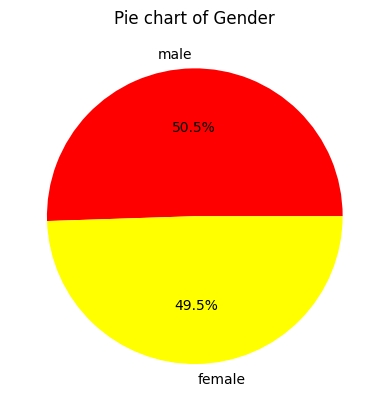

In [10]:
gender = df['sex'].value_counts()

plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct='%1.1f%%',colors=['red', 'yellow'])
plt.title('Pie chart of Gender')
gender



the pie chart shows that there is an comparitively equal number of male and females in the dataset


## Insights we get from heatmap
1.Strong relationship between smoker and medical charges

2.Age and number of childrens also has a relationship with charges

## How heatmap helps us
in this dataset from heatmap we can limit our charts to only those which have a relationship with charges



C:\Users\karti\AppData\Local\Temp\ipykernel_20296\981020500.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copy_data['smoker']= copy_data['smoker'].replace({'yes':1,'no':0})
C:\Users\karti\AppData\Local\Temp\ipykernel_20296\981020500.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copy_data['sex']=copy_data['sex'].replace({'male':1,'female':0})


<Axes: >

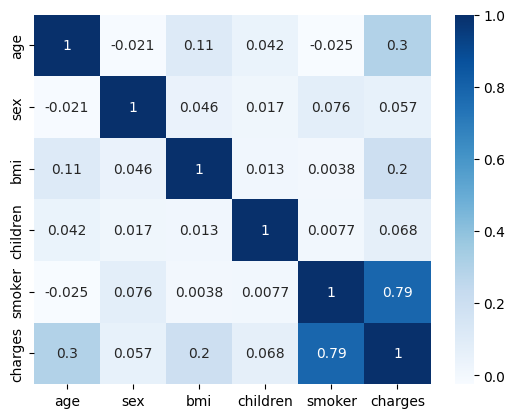

In [11]:
copy_data=df.copy()

copy_data['smoker']= copy_data['smoker'].replace({'yes':1,'no':0})
copy_data['sex']=copy_data['sex'].replace({'male':1,'female':0})


copy_data.drop('region',axis=1,inplace=True,)


relation = copy_data.corr()
sns.heatmap(relation,annot=True,cmap='Blues')

<Axes: xlabel='sex', ylabel='count'>

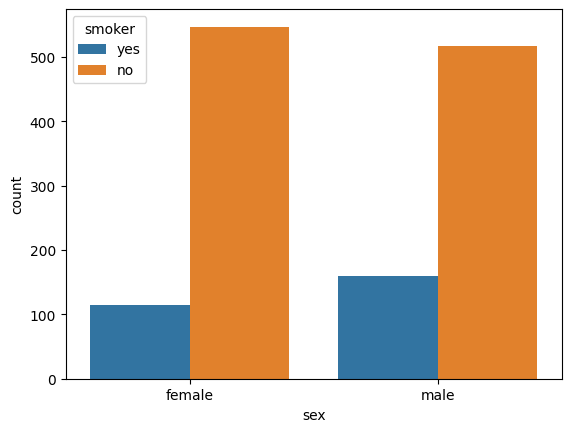

In [12]:
sns.countplot(x='sex', data=df, hue='smoker') # Visualizing the count of smokers by gender


1. from the bar plot we get to know about the male and female numbers who smoke.
2.   blue->smokers...........
         orange->non-smokers
       

Text(0.5, 1.0, 'Pie chart of Smoker')

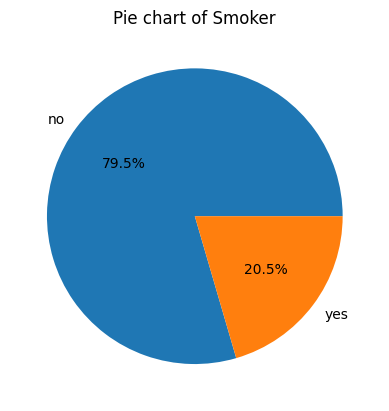

In [13]:
smoker_count=df['smoker'].value_counts()
plt.pie(smoker_count,labels=smoker_count.index,autopct='%1.1f%%')  # Pie chart for smoker distribution
plt.title('Pie chart of Smoker')

<Axes: xlabel='smoker', ylabel='charges'>

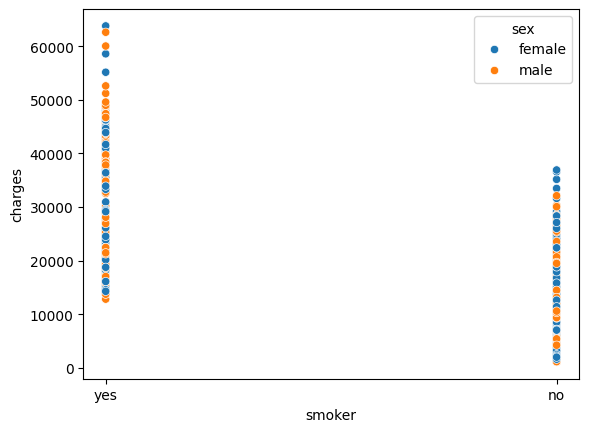

In [14]:
sns.scatterplot(x=df['smoker'], y=df['charges'], hue=df['sex']) 



the data shows that the smokers have to pay more then  the non smokers

### Calculations

In [15]:
count=len(df[(df['smoker'] == 'yes') & (df['sex'] == 'male')])
print( "no of male smoker :" ,count)
count_woman=len(df[(df['smoker'] == 'yes') & (df['sex'] == 'female')])
print( "no of female smoker :" ,count_woman)
count_woman_total=len(df[df['sex']=='female'])
print( "total female :" ,count_woman_total)
count_male_total=len(df[df['sex']=='male'])
print( "total male :" ,count_male_total)






no of male smoker : 159
no of female smoker : 115
total female : 662
total male : 676


## Count Plot b/w number of childrens and frequency

Text(0.5, 1.0, 'Count of Children')

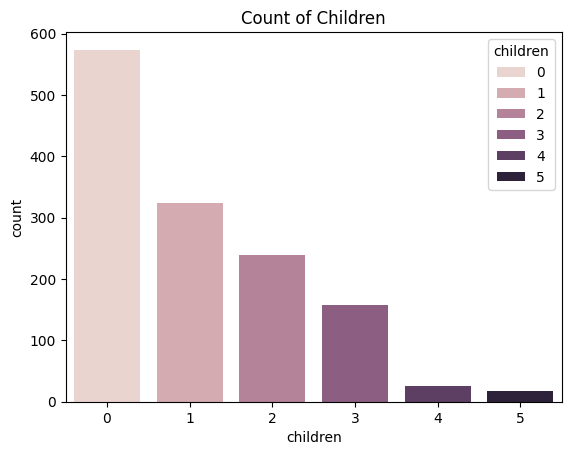

In [16]:
sns.countplot(x='children', data=df, hue='children')
plt.title('Count of Children')

<Axes: xlabel='children', ylabel='charges'>

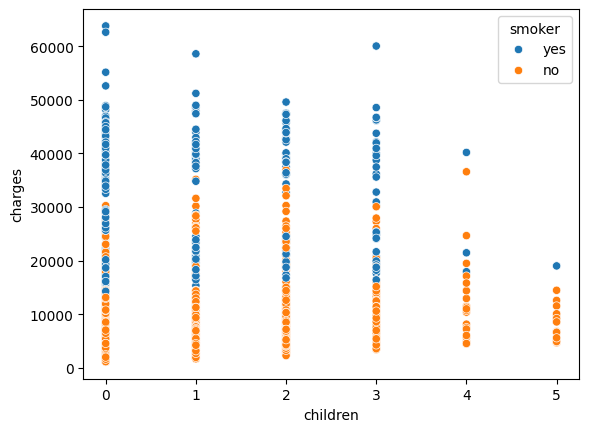

In [17]:
sns.scatterplot(x='children', y='charges', data=df, hue='smoker')


1.the insights from the count plot is that there is a decline in the  individuals with more  childrens.




Text(0, 0.5, 'Charges')

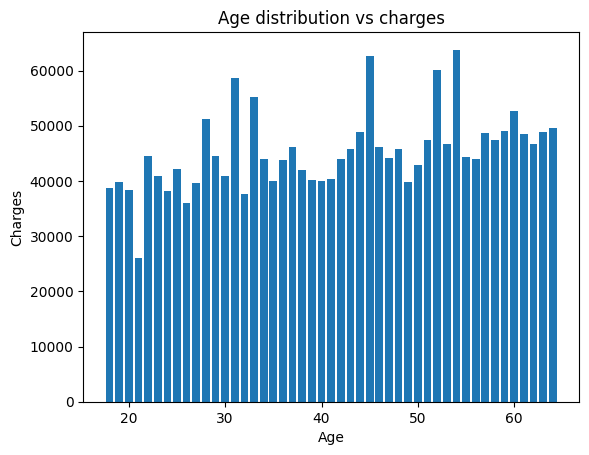

In [18]:
plt.title('Age distribution vs charges')

plt.bar(df['age'],df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')



Age does not influence the charges by a huge margin

### Scatter Plot b/w charges and **bmi**


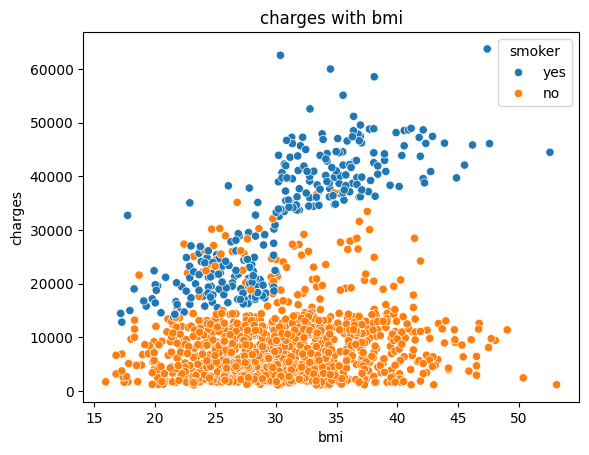

In [19]:
plt.title('charges with bmi')
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')
plt.show()

### from the plot
the scatter plot shows that high bmi individuals also have similar charges to lower bmi individuals but for same BMI value smokers are still paying higher charges. 


## Scatter Plot between male and females charges in accordance to them being smoker or not

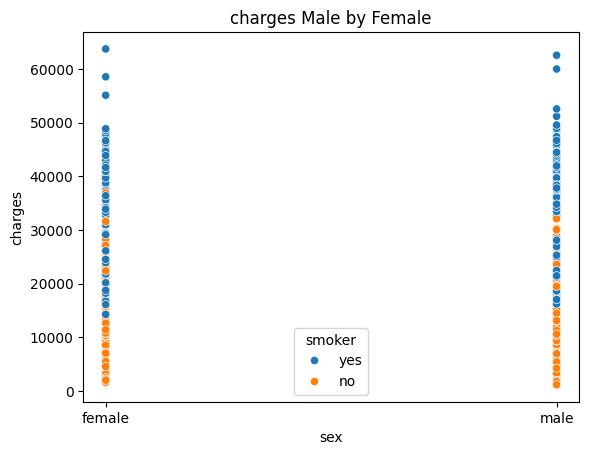

In [20]:
plt.title('charges Male by Female')
sns.scatterplot(x='sex',y='charges',data=df,hue='smoker')
plt.show()

## Insight
1.The charges for a smoker doesn't much relies in terms of gender perspective

